# Exploration du commerce de Dunkerque

In [34]:
import csv
import json
import pandas as pd
import numpy as np
from os.path import join
from collections import Counter
from dunkerquesprint import get_online_csv

In [2]:
DUNKERQUE_UHGS_ID = 'A0204180'

## Chargement des données Navigo

In [3]:
NAVIGO = []

def filter_row(row):
    return row['destination_uhgs_id'] == DUNKERQUE_UHGS_ID or row['departure_uhgs_id'] == DUNKERQUE_UHGS_ID

navigo_source_files = [
    'navigo_all_flows_1787.csv',
    'navigo_all_flows_1789.csv'
]

for source_file in navigo_source_files:
    with open(join('../../data', source_file), encoding='utf8') as f:
        for row in csv.DictReader(f):
            if filter_row(row):
                NAVIGO.append(row)
                
            # Parsing cargo
            if row['all_cargos']:
                row['cargo'] = [c['commodity_purpose'] for c in eval(row['all_cargos'])]
            else:
                row['cargo'] = []

len(NAVIGO)

5219

In [4]:
COMMODITIES_TO_DUNKERQUE = Counter()
COMMODITIES_FROM_DUNKERQUE = Counter()

for row in NAVIGO:    
    for commodity in row['cargo']:
        target = COMMODITIES_TO_DUNKERQUE if row['destination_uhgs_id'] == DUNKERQUE_UHGS_ID else COMMODITIES_FROM_DUNKERQUE
        target[commodity] += 1

In [5]:
COMMODITIES_TO_DUNKERQUE.most_common(10)

[('sel', 157),
 ('Sel', 94),
 ('Vin', 56),
 ('Sucre', 13),
 ('Autres', 8),
 ('Lest', 8),
 ('Café', 8),
 ('Autres marchandises', 7),
 ('Barriques vides', 7),
 ('Eau de vie', 6)]

In [6]:
COMMODITIES_FROM_DUNKERQUE.most_common(10)

[('Lège', 2437),
 ('Etc.', 879),
 ('Genevre', 802),
 ('Autres marchandises', 185),
 ('genevre', 137),
 ('Sucre', 122),
 ('Eau de vie', 98),
 ('Tabac', 94),
 ('autres marchandises', 67),
 ('faire la pêche', 62)]

## Données de pêche

In [58]:
PECHE_DATA = get_online_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSRy3fIKwWXSRg4QI_A9sQRNmWKnsNSA-TpgMenVz0twxfRmJGiFKN8Q8VSpBwxNw/pub?gid=351410703&single=true&output=csv')

for row in PECHE_DATA:
    for k, v in row.items():
        row[k] = int(v) if v else 0

In [70]:
df_peche = pd.DataFrame(data=PECHE_DATA)
df_peche.head(10)

,Année,Islande,Hitlande,Hareng,Terre-Neuve,Dogre Banc
0,1763,81891,64269,355800,0,0
1,1764,214218,81549,480560,0,0
2,1765,411990,91178,361658,0,0
3,1766,515301,49516,205002,0,0
4,1767,470314,67666,373652,0,0
5,1768,496928,71727,201899,0,0
6,1769,547641,96073,179246,0,0
7,1770,589933,68194,164453,72563,6636
8,1771,541443,60004,84318,106543,3240
9,1772,622111,67587,102971,45515,0


<AxesSubplot:xlabel='Année'>

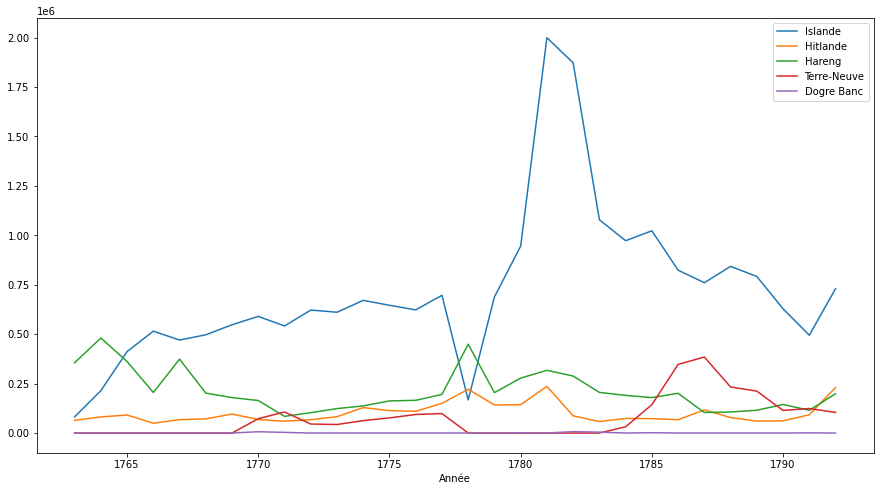

In [71]:
df_peche.plot.line(figsize=(15, 8), x='Année')